<a href="https://colab.research.google.com/github/smerinobluewin/hello-world/blob/master/brown_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

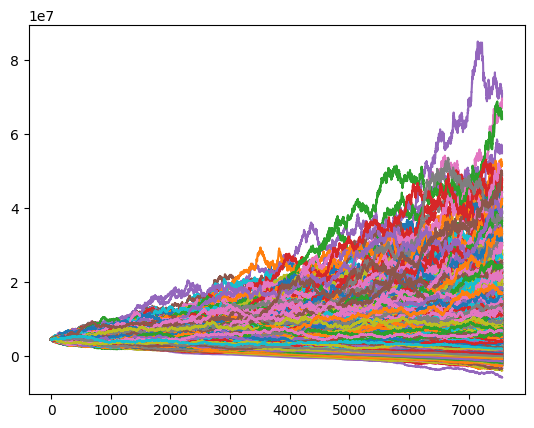

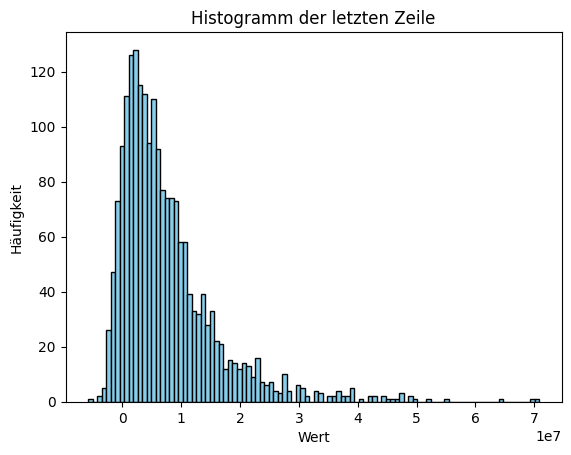

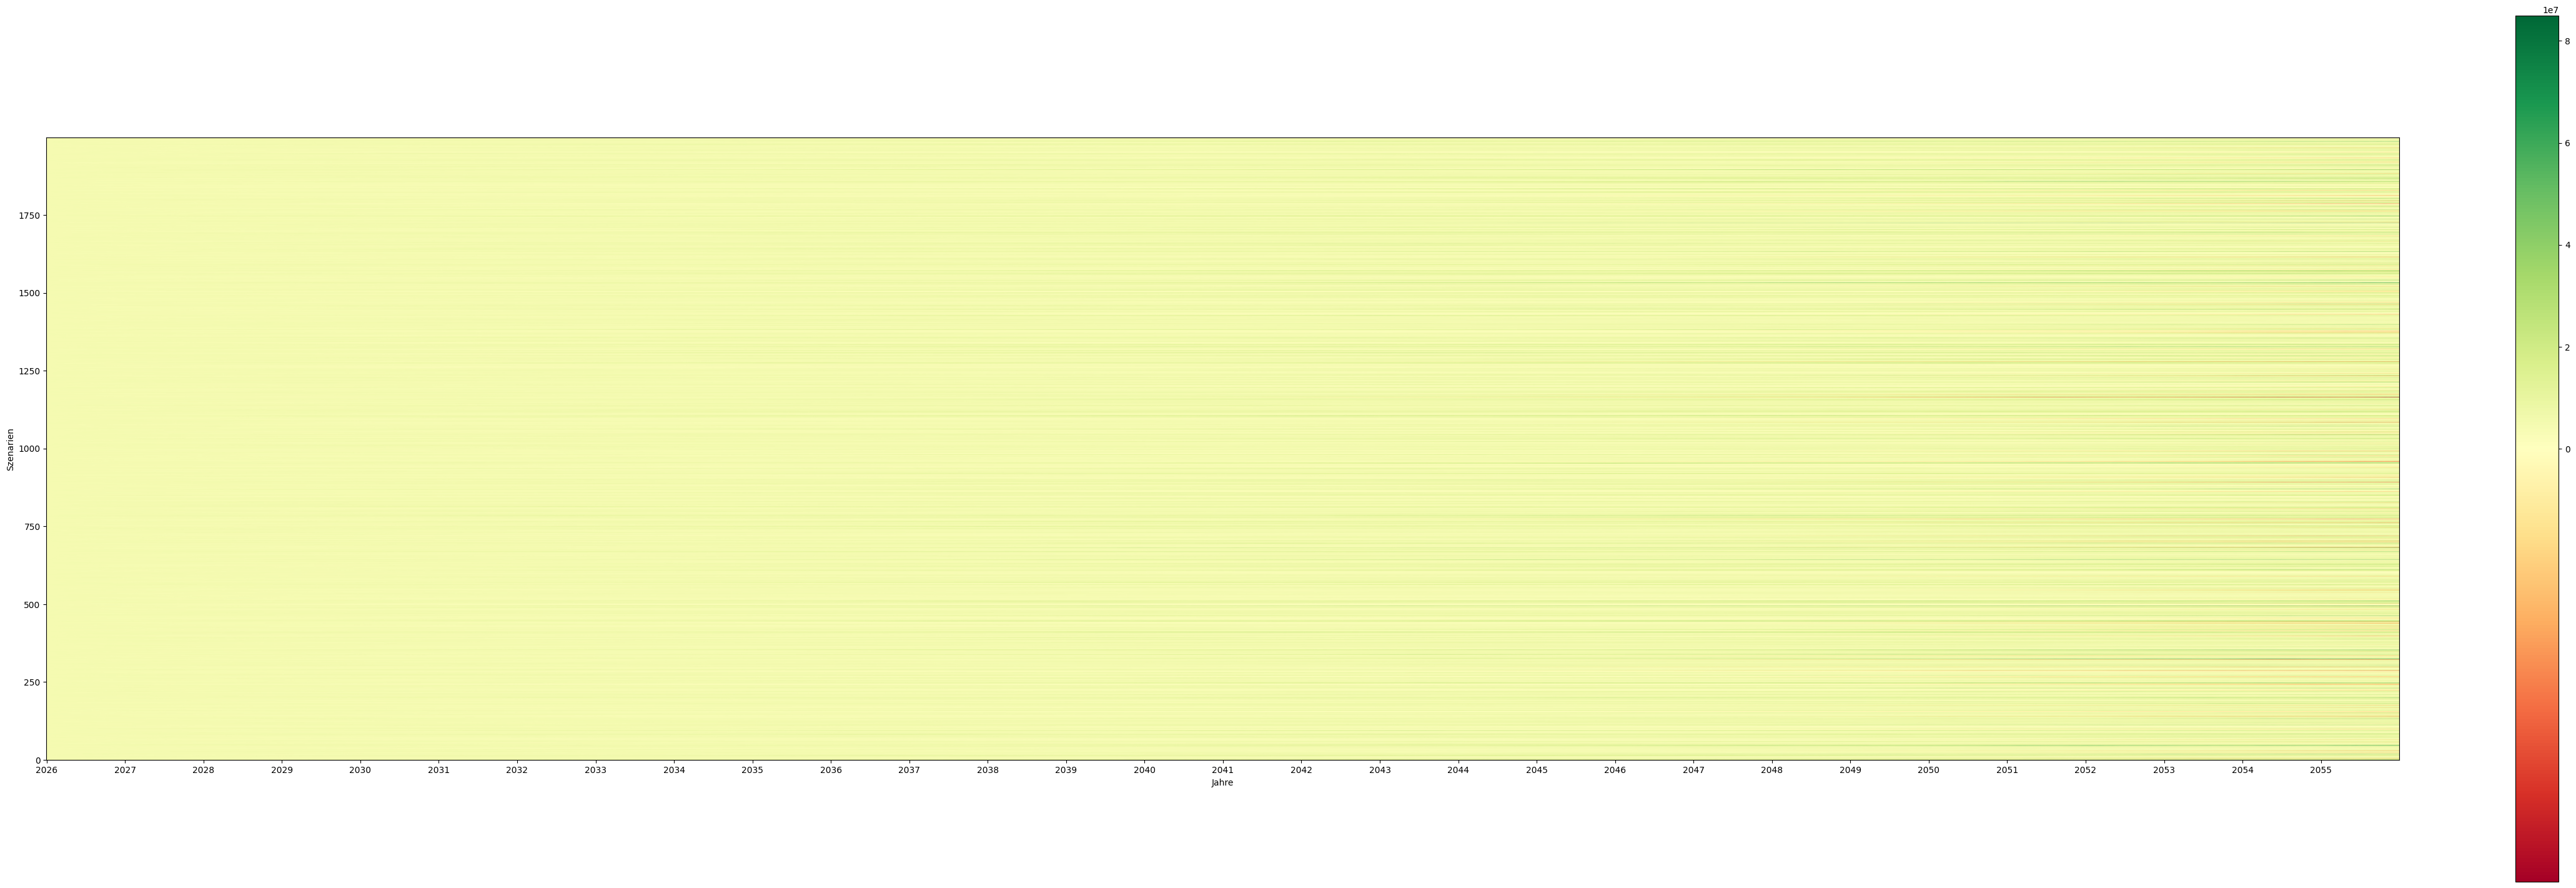

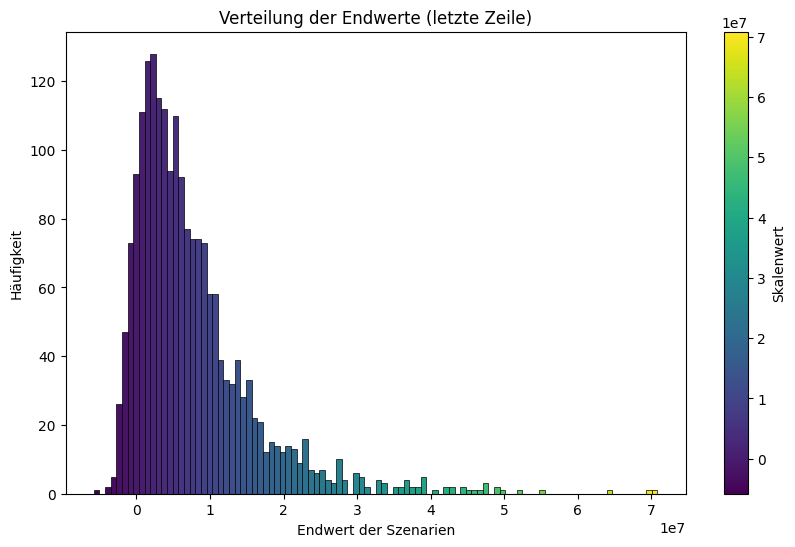

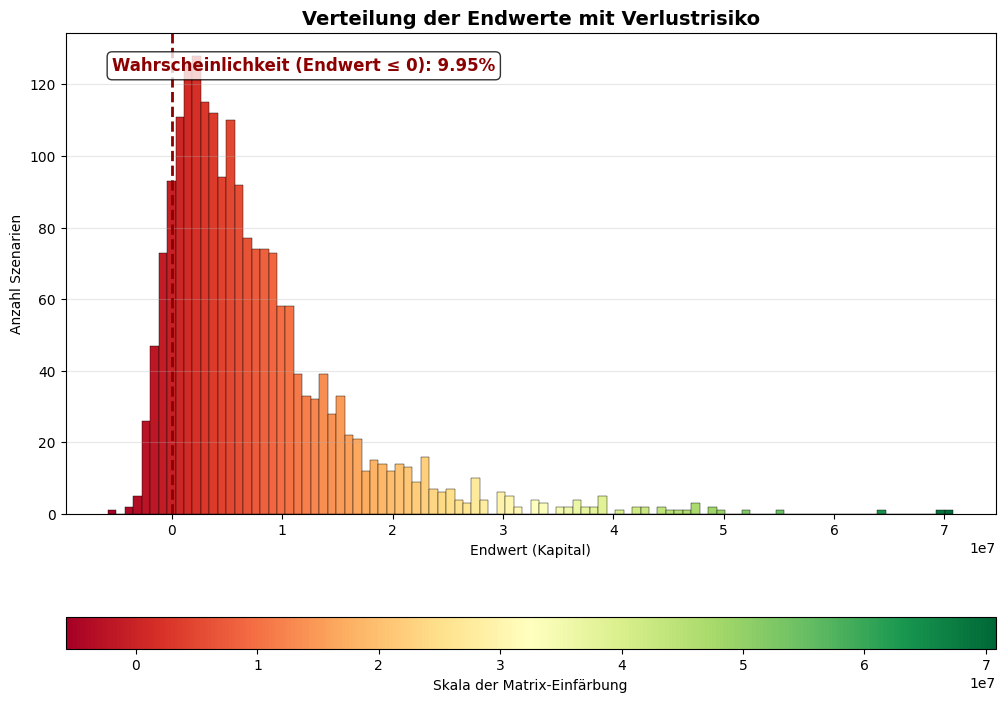

df=1000


In [76]:
from PIL.Image import SupportsArrayInterface
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.colors as mcolors






mu=0.05
sigma=0.11
df=1000    # Parameter of t-distribution, smaller 5 equals fat tail, tending to normal distribution if large
Sstart=4500000
S1=Sstart
C=180000
Npath=2000                   # number of simulation paths
N= 30*252                    # number of time steps (days)
dt=1/252                      # 252 trading days
S1=S1*np.ones((1, Npath))  # initialize row vector of length Npath to build matrix of paths
S1=np.round(S1,0)
#print(S1)
DATA=-1*np.ones((N,Npath))    # initialize matrix of paths with Npath scenarios of time length N
#print(DATA)
# St=np.array([S1], dtype=np.float32)

DATA[0, :] = S1
#print(f"{DATA=}")

rng = np.random.default_rng()
t_std_dev = np.sqrt(df / (df - 2))

for number in range(1, N):
    # 1. Erzeuge standard-normale Zufallszahlen (Zentriert um 0, StdDev 1)
    eps = rng.standard_normal((1, Npath))

    # 2. Asymmetrie einbauen:
    # Wenn eps negativ ist (Markt fällt), ersetzen wir es durch einen t-verteilten Wert
    # Das erzeugt "Fat Tails" nur auf der linken Seite (Verluste)
    mask_negative = eps < 0
    if np.any(mask_negative):
        # Generiere t-verteilte Werte für die negativen Fälle
        neg_t_samples = rng.standard_t(df, size=eps.shape) / t_std_dev
        # Wir nehmen nur die Werte, die auch wirklich negativ sind (linksseitig)
        eps[mask_negative] = -np.abs(neg_t_samples[mask_negative])

    # 3. Exakte GBM-Formel (wie besprochen)
    drift = (mu - 0.5 * sigma**2) * dt
    diffusion = sigma * eps * np.sqrt(dt)

    S = S1 * np.exp(drift + diffusion) - C * dt

    DATA[number, :] = S
    S1 = S
















"""


for number in range(1, N):

    # Statt standard_normal:
    eps_raw = rng.standard_t(df, size=(1, Npath))

    #df : Freiheitsgrade (5 ist ein guter Kompromiss für Aktienmärkte) oben gesetzt

    # Korrekturfaktor berechnen, damit die Volatilität exakt sigma entspricht
    # Standardabweichung der t-Verteilung = Wurzel(df / (df - 2))
    t_std_dev = np.sqrt(df / (df - 2))


    # 2. Skalieren: Durch eigene StdDev teilen (auf 1 normieren)
    #    und dann mit deiner Ziel-Volatilität verrechnen
    eps = eps_raw / t_std_dev

    # Standard_normal:

    #eps = rng.standard_normal((1, Npath))

    # Exakte GBM Formel für stabilere Pfade
    # Wir berechnen erst die Rendite und wenden sie dann auf S an
    drift = (mu - 0.5 * sigma**2) * dt
    diffusion = sigma * eps * np.sqrt(dt)

    # S_neu = S_alt * e^(drift + diffusion) - Entnahme
    S = S1 * np.exp(drift + diffusion) - C * dt


    DATA[number, :] = S
    S1 = S
"""










#for number in range(1,N):
#  #print(number)
#  rng=np.random.default_rng()
#  eps=rng.standard_normal((1, Npath)) # Note the tuple for dimensions
  #print(eps)
  #eps=random.normalvariate(mu=0,sigma=1)
#  S=S1+S1*(mu*dt+sigma*eps*np.sqrt(dt)) - C*dt
#  #print(S)
#  DATA[number, :] = S
#  S1=S
  #St=np.column_stack((St,S))

DATA=np.round(DATA,0)
#print(DATA)
#print(f"{DATA=}")
#print(St[1:10])
#print(St[-1])

data=DATA.flatten()
#print(data[1:11])

# Analogous to plot(x) in MATLAB
#plt.plot(DATA[:,1])
#plt.show()

plt.plot(DATA)
plt.show()

plt.hist(DATA[-1], bins=100, color='skyblue', edgecolor='black')
plt.title("Histogramm der letzten Zeile")
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.show()

#plt.imshow(DATA, cmap='viridis', origin='lower') # 'cmap' definiert das Farbschema
#plt.colorbar() # Fügt die Farbskala an der Seite hinzu
#plt.title("2D-Matrix Visualisierung")
#plt.show()





# Beispiel: Werte von -50 bis +100
#data = np.random.uniform(-50, 100, (10, 10))

# Normierung: - SStart ist das Minimum, 0 ist die Mitte (Weiss), Sstart ist das Maximum
minDATA = DATA.min()
maxDATA = DATA.max()

if minDATA <= 0:
    vcenter = 0
else:
    vcenter =0.5*(minDATA+maxDATA)


#print(f"{minDATA}")
#print(f"{maxDATA}")

norm = colors.TwoSlopeNorm(vmin=minDATA, vcenter=vcenter, vmax=maxDATA)
plt.figure(figsize=(60, 180))


# 1. Anzahl der Tage aus den Zeilen von DATA holen
anzahl_tage = DATA.shape[0]
tage_pro_jahr = 252

# 2. Positionen für die Ticks berechnen (0, 252, 504...)
tick_positions = np.arange(0, anzahl_tage, tage_pro_jahr)

# 3. Labels erstellen (z.B. "Jahr 1", "Jahr 2" oder "2024", "2025")
start_jahr = 2026
tick_labels = [str(start_jahr + i) for i in range(len(tick_positions))]

#ax = plt.gca()
# Aktuelle Ticks holen
#ticks = list(ax.get_yticks())
# 1000 hinzufügen, falls nicht vorhanden
#if Npath not in ticks:
#    ticks.append(Npath)
#ax.set_yticks(ticks)


if vcenter == 0:
    if minDATA < 0: # Only use TwoSlopeNorm if there are values below 0
        # Klassisch: Alles unter 0 wird rot (Rd), alles darüber blau (Bu)
        norm = colors.TwoSlopeNorm(vmin=minDATA, vcenter=0, vmax=maxDATA)
        current_cmap = 'RdYlGn'
    else: # If minDATA is 0 and vcenter is 0, use Normalize
        norm = colors.Normalize(vmin=minDATA, vmax=maxDATA)
        current_cmap = 'Greens' # Assuming Greens is desired for non-negative values
else:
    # Wenn vcenter > 0, nutzen wir eine sequentielle Skala (z.B. nur Blau-Töne)
    # oder wir setzen vcenter trotzdem auf 0, um Rot nur für echte Verluste zu zeigen
    norm = colors.Normalize(vmin=minDATA, vmax=maxDATA)
    # Optional: Wechsel zu einer Farbe, die keine "Verlust-Assoziation" hat
    current_cmap = 'Greens'


plt.imshow(DATA.T, cmap= current_cmap, norm=norm, origin='lower')
plt.colorbar(shrink=0.1, fraction=0.15, pad=0.04)

# Ticks auf der X-Achse setzen
plt.xticks(tick_positions, tick_labels)

plt.xlabel("Jahre")
plt.ylabel("Szenarien")
plt.show()






# Die Werte der letzten Zeile (Endwerte)
final_values = DATA[-1, :]

# 2. Setup für die Farbskala (muss identisch zur Matrix-Visualisierung sein)
vmin, vmax = final_values.min(), final_values.max()
cmap = cm.viridis  # Deine gewählte Colormap
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 3. Plot erstellen
fig, ax = plt.subplots(figsize=(10, 6))

# Histogramm berechnen
n_bins = 100
n, bins, patches = ax.hist(final_values, bins=n_bins, edgecolor='black', linewidth=0.5)

# 4. Jeden Balken basierend auf seiner Position in der Colormap einfärben
for bin_edge, patch in zip(bins, patches):
    color = cmap(norm(bin_edge))
    patch.set_facecolor(color)

# Optik verfeinern
ax.set_title('Verteilung der Endwerte (letzte Zeile)')
ax.set_xlabel('Endwert der Szenarien')
ax.set_ylabel('Häufigkeit')

# Optional: Colorbar hinzufügen, um die Skala zu zeigen
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, ax=ax, orientation='vertical', label='Skalenwert')

plt.show()




# --- START: Histogramm mit Verlustwahrscheinlichkeit (P < 0) ---

# 1. Berechnung der Wahrscheinlichkeit
final_values = DATA[-1, :]
prob_loss = (final_values <= 0).sum() / len(final_values) * 100

# 2. Grafik erstellen
fig, (ax_hist, ax_cb) = plt.subplots(2, 1, figsize=(12, 8),
                                      gridspec_kw={'height_ratios': [15, 1]})
fig.subplots_adjust(hspace=0.4)

# 3. Histogramm plotten und einfärben
n, bins, patches = ax_hist.hist(final_values, bins=100, edgecolor='black', linewidth=0.3)
cmap_obj = plt.get_cmap(current_cmap)

for bin_edge, patch in zip(bins, patches):
    color = cmap_obj(norm(bin_edge))
    patch.set_facecolor(color)

# 4. Markierung der Nulllinie und Wahrscheinlichkeitstext
ax_hist.axvline(x=0, color='darkred', linestyle='--', linewidth=2, label='Null-Linie')

# Textbox für die Wahrscheinlichkeit hinzufügen
textstr = f'Wahrscheinlichkeit (Endwert \u2264 0): {prob_loss:.2f}%'
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax_hist.text(0.05, 0.95, textstr, transform=ax_hist.transAxes, fontsize=12,
             verticalalignment='top', bbox=props, color='darkred', fontweight='bold')

# Optik Histogramm
ax_hist.set_title("Verteilung der Endwerte mit Verlustrisiko", fontsize=14, fontweight='bold')
ax_hist.set_xlabel("Endwert (Kapital)")
ax_hist.set_ylabel("Anzahl Szenarien")
ax_hist.grid(axis='y', alpha=0.3)

# 5. Separate Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap_obj, norm=norm)
cb = fig.colorbar(sm, cax=ax_cb, orientation='horizontal')
cb.set_label('Skala der Matrix-Einfärbung')

plt.show()



print(f"{df=}")







#sns.heatmap(DATA, annot=True, cmap='YlGnBu')
#plt.show()

#plt.hist(data, bins=100, color='skyblue', edgecolor='black')
#plt.title("Mein erstes Histogramm")
#plt.xlabel("Werte")
#plt.ylabel("Häufigkeit")
#plt.show()
